# Notebook Setup

In [112]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
cd /content/drive/MyDrive/itau/

/content/drive/MyDrive/itau


In [115]:
!pip install pyspark

# Metric Evaluation

The mAP for recommendation systems [link](https://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html#:~:text=MAP%20is%20very%20popular%20evaluation,to%20user%2Dtargeted%20product%20recommendations.&text=a%20useful%20metric.-,Using%20MAP%20to%20evaluate%20a%20recommender%20algorithm%20implies%20that%20you,recommendation%20like%20a%20ranking%20task.), [link2](https://towardsdatascience.com/breaking-down-mean-average-precision-map-ae462f623a52)

In [ ]:
!pip install ml_metrics

In [ ]:
import ml_metrics 
import numpy as np

In [ ]:
actual = ['1', '2', '3', '7', '8' ]
predicted = ['5', '1', '2', '6', '7']
k = 5
AP = 1/len(actual)*(0*0 + (1/2)*1 + (2/3)*1 + (2/4)*0 + (3/5)*1)
print('AP: ', AP)
print('APlib: ',ml_metrics.apk(actual=actual, predicted=predicted, k=k))

AP:  0.35333333333333333
APlib:  0.35333333333333333


In [ ]:
import ml_metrics
ml_metrics.apk(actual=['A','C'], predicted=['B','A','C'], k=3)

0.5833333333333333

In [ ]:
actual = ['1' ]
predicted = ['1', '2', '6', '7']
#predicted = ['1']
k = 5
AP = 1/len(actual)*(1*1 + (1/2)*0 + (1/3)*0 + (2/4)*0 + (3/5)*0)
print('AP: ', AP)
print('APlib: ',ml_metrics.apk(actual=actual, predicted=predicted, k=k))

AP:  1.0
APlib:  1.0


In [ ]:
actual = ['1', '2', '3', '7' ]
predicted = ['5', '1', '2', '6', '7']
k = 5
AP = 1/len(actual)*(0*0 + (1/2)*1 + (2/3)*1 + (2/4)*0 + (3/5)*1)
print('AP: ', AP)
print('APlib: ',ml_metrics.apk(actual=actual, predicted=predicted, k=k))

AP:  0.44166666666666665
APlib:  0.44166666666666665


**Conclusion:** El enviar respuestas equivocadas al final no afecta la AP@k pero si aumenta el chance de pegarle.
Enviar siempre 5!

In [ ]:
actual = ['1']
predicted = ['5', '1', '2', '6', '7']
k = 5
AP = 1/len(actual)*(1*0 + (1/2)*1 + (1/3)*0 + (1/4)*0 + (1/5)*0)
print('AP: ', AP)
print('APlib: ',ml_metrics.apk(actual=actual, predicted=predicted, k=k))

AP:  0.5
APlib:  0.5


In [ ]:
actual = [['1', '2', '3'], ['1','2']]
predicted = [['1', '5', '8'], ['1','1','1']]
k = 3
print('mAP@3', ml_metrics.mapk(actual, predicted, k))
print('mean(AP@3)', (ml_metrics.apk(actual[0], predicted[0],k) + ml_metrics.apk(actual[1], predicted[1],k))/2)

mAP@3 0.41666666666666663
mean(AP@3) 0.41666666666666663


In [ ]:
import ml_metrics 
actual = [['1', '2', '3']]
predicted = [['1']]
predicted = [['1', '0']] # These two predictions grade equally
k = 3
ml_metrics.mapk(actual, predicted, k)

0.3333333333333333

# Importing Data

In [ ]:
ls data

Campanas_test.csv         data_counts.pkl        features_counts.pkl
Campanas_train.csv        Diccionario.xlsx       Transaccion_test.csv
Comunicaciones_test.csv   ejemplo_entregaVF.csv  Transaccion_train.csv
Comunicaciones_train.csv  features_count.csv
Consumidores.csv          features_counts.csv


In [ ]:
import pandas as pd

In [ ]:
campains_train_df = pd.read_csv('/content/drive/My Drive/itau/data/'+'Campanas_train.csv',index_col=['Unnamed: 0'])
dtypes = {"id": "category",
          "Id_Producto": "category",
          "Tipo": "category",
          "Producto-Tipo": "category",
          "Fecha_Campaña": "datetime64[ns]",
          "Periodo": "int64",
          "Canal": "category",
          "Duracion_Campaña": "int64"}
campains_train_df = campains_train_df.astype(dtypes)
display(campains_train_df.head(3))
print("\nNaN counts:\n")
display(campains_train_df.isna().sum())

,id,Id_Producto,Tipo,Producto-Tipo,Fecha_Campaña,Periodo,Resultado,Canal,Duracion_Campaña
0,1,A,A,A-A,2020-01-02,202001,0,B,1
1,1,B,B,B-B,2020-01-21,202001,0,C,1
2,1,A,A,A-A,2020-02-03,202002,0,B,1



NaN counts:



id                  0
Id_Producto         0
Tipo                0
Producto-Tipo       0
Fecha_Campaña       0
Periodo             0
Resultado           0
Canal               0
Duracion_Campaña    0
dtype: int64

In [ ]:
campains_test_df = pd.read_csv('/content/drive/My Drive/itau/data/'+'Campanas_test.csv',index_col=['Unnamed: 0'])
dtypes = {"id": "category",
          "Id_Producto": "category",
          "Tipo": "category",
          "Producto-Tipo": "category",
          "Fecha_Campaña": "datetime64[ns]",
          "Periodo": "int64",
          "Canal": "category",
          "Duracion_Campaña": "int64"}
campains_test_df = campains_test_df.astype(dtypes)
display(campains_test_df.head(3))
print("\nNaN counts:\n")
display(campains_test_df.isna().sum())

,id,Id_Producto,Tipo,Producto-Tipo,Fecha_Campaña,Periodo,Canal,Duracion_Campaña
0,1,A,A,A-A,2020-09-03,202009,B,1
1,1,D,E,D-E,2020-10-23,202010,C,1
2,1,B,B,B-B,2020-08-27,202008,C,1



NaN counts:



id                  0
Id_Producto         0
Tipo                0
Producto-Tipo       0
Fecha_Campaña       0
Periodo             0
Canal               0
Duracion_Campaña    0
dtype: int64

In [ ]:
comunications_train_df = pd.read_csv('/content/drive/My Drive/itau/data/'+'Comunicaciones_train.csv',index_col=['Unnamed: 0'])
dtypes = {"id": "category",
          "Id_Producto": "category",
          "Tipo": "category",
          "Producto-Tipo": "category",
          "Tipo_comunicacion": "category",
          "Fecha": "datetime64[ns]",
          "Periodo": "int64",
          "Lectura": "category"}
comunications_train_df = comunications_train_df.astype(dtypes)
display(comunications_train_df.head(3))
print("\nNaN counts:\n")
display(comunications_train_df.isna().sum())
display(comunications_train_df.describe(include="all"))

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,id,Id_Producto,Tipo,Producto-Tipo,Tipo_comunicacion,Fecha,Periodo,Lectura
0,1,B,B,B-B,A,2020-03-02,202003,0
1,1,E,E,E-E,A,2020-03-20,202003,0
2,1,B,B,B-B,A,2020-01-09,202001,0



NaN counts:



id                   0
Id_Producto          0
Tipo                 0
Producto-Tipo        0
Tipo_comunicacion    0
Fecha                0
Periodo              0
Lectura              0
dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,id,Id_Producto,Tipo,Producto-Tipo,Tipo_comunicacion,Fecha,Periodo,Lectura
count,1358414.0,1358414,1358414,1358414,1358414,1358414,1.358414e+06,1358414.0
unique,77494.0,5,4,5,1,68,NaN,2.0
top,29116.0,B,B,B-B,A,2020-03-20 00:00:00,NaN,0.0
freq,56.0,950027,950027,950027,1358414,118562,NaN,910946.0
first,NaN,NaN,NaN,NaN,NaN,2019-03-06 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2020-07-31 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.019676e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4.615689e+01,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2.019030e+05,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.019080e+05,NaN


In [ ]:
comunications_test_df = pd.read_csv('/content/drive/My Drive/itau/data/'+'Comunicaciones_test.csv',index_col=['Unnamed: 0'])
dtypes = {"id": "category",
          "Id_Producto": "category",
          "Tipo": "category",
          "Producto-Tipo": "category",
          "Tipo_comunicacion": "category",
          "Fecha": "datetime64[ns]",
          "Periodo": "int64",
          "Lectura": "category"}
comunications_test_df = comunications_test_df.astype(dtypes)
display(comunications_test_df.head(3))
print("\nNaN counts:\n")
display(comunications_test_df.isna().sum())
display(comunications_test_df.describe(include="all"))

,id,Id_Producto,Tipo,Producto-Tipo,Tipo_comunicacion,Fecha,Periodo,Lectura
0,1,B,B,B-B,A,2020-08-07,202008,1
1,1,B,B,B-B,A,2020-08-27,202008,1
2,1,B,B,B-B,A,2020-09-30,202009,0



NaN counts:



id                   0
Id_Producto          0
Tipo                 0
Producto-Tipo        0
Tipo_comunicacion    0
Fecha                0
Periodo              0
Lectura              0
dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,id,Id_Producto,Tipo,Producto-Tipo,Tipo_comunicacion,Fecha,Periodo,Lectura
count,230251.0,230251,230251,230251,230251,230251,230251.000000,230251.0
unique,64306.0,3,3,3,1,15,NaN,2.0
top,68414.0,B,B,B-B,A,2020-10-28 00:00:00,NaN,0.0
freq,13.0,156440,156440,156440,230251,64230,NaN,137264.0
first,NaN,NaN,NaN,NaN,NaN,2020-08-04 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2020-10-28 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,202009.262765,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.874774,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,202008.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,202008.000000,NaN


In [ ]:
customers_df = pd.read_csv('/content/drive/My Drive/itau/data/'+'Consumidores.csv',index_col=['Unnamed: 0'])
dtypes = {'Edad': 'category', 'Sexo': 'category', 'Renta': 'category', 'Recibe_sueldo_en_cuenta': 'category',
       'Segmento_consumidor': 'category', 'Meses_antiguedad': 'category', 'Comuna':'category', 'Ciudad': 'category',
       'Estado_civil': 'category', 'Principalidad': 'category', 'Profesion': 'category', 'id': 'category'}
customers_df = customers_df.astype(dtypes)
display(customers_df.head(3))
print("\nNaN counts:\n")
display(customers_df.isna().sum())
display(customers_df.describe(include="all"))

,Edad,Sexo,Renta,Recibe_sueldo_en_cuenta,Segmento_consumidor,Meses_antiguedad,Comuna,Ciudad,Estado_civil,Principalidad,Profesion,id
0,Mayor a 70,1,R1,0,A,Mayor a 10 años,331.0,13.0,D,B,P164,1
1,Mayor a 70,1,R9,0,B,Mayor a 10 años,37.0,5.0,D,E,P164,2
2,Mayor a 70,1,R9,1,B,Mayor a 10 años,19.0,4.0,B,D,P114,3



NaN counts:



Edad                           0
Sexo                           0
Renta                          0
Recibe_sueldo_en_cuenta        0
Segmento_consumidor            0
Meses_antiguedad               0
Comuna                        58
Ciudad                         4
Estado_civil                   0
Principalidad              12161
Profesion                    421
id                             0
dtype: int64

,Edad,Sexo,Renta,Recibe_sueldo_en_cuenta,Segmento_consumidor,Meses_antiguedad,Comuna,Ciudad,Estado_civil,Principalidad,Profesion,id
count,79539,79539,79539,79539,79539,79539,79481.0,79535.0,79539,67378,79118,79539
unique,11,2,21,2,2,11,322.0,16.0,5,7,210,79539
top,Entre 35 y 40,1,R3,0,A,Menos de 1 año,71.0,13.0,A,B,P164,79539
freq,13806,47458,18089,44052,58915,77342,6419.0,46802.0,45817,18017,9923,1


In [ ]:
transactions_train_df = pd.read_csv('/content/drive/My Drive/itau/data/'+'Transaccion_train.csv',index_col=['Unnamed: 0'])
dtypes = {'id':'category', 'Id_Producto':'category', 'Tipo':'category', 'Producto-Tipo':'category', 'Signo':'category', 'Monto':'float64', 
          'Fecha':'datetime64[ns]','Periodo':'int'}
transactions_train_df = transactions_train_df.astype(dtypes)
display(transactions_train_df.head(3))
print("\nNaN counts:\n")
display(transactions_train_df.isna().sum())
display(transactions_train_df.describe(include="all"))

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,id,Id_Producto,Tipo,Producto-Tipo,Signo,Monto,Fecha,Periodo
0,1,F,D,F-D,Positivo,377142.84375,NaT,201901
1,1,F,D,F-D,Positivo,577142.87500,NaT,201903
2,1,F,D,F-D,Positivo,548571.43750,NaT,201904



NaN counts:



id                      0
Id_Producto             0
Tipo                    0
Producto-Tipo           0
Signo             1439192
Monto                   0
Fecha            21984022
Periodo                 0
dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,id,Id_Producto,Tipo,Producto-Tipo,Signo,Monto,Fecha,Periodo
count,24397537.0,24397537,24397537,24397537,22958345,2.439754e+07,2413515,2.439754e+07
unique,79539.0,7,12,16,2,NaN,554,NaN
top,19847.0,G,K,G-K,Negativo,NaN,2019-05-28 00:00:00,NaN
freq,1696.0,11043005,18729512,11043005,20819321,NaN,63914,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-31 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.075116e+05,NaN,2.019407e+05
std,NaN,NaN,NaN,NaN,NaN,1.167315e+07,NaN,4.640839e+01
min,NaN,NaN,NaN,NaN,NaN,-2.590314e+04,NaN,2.019010e+05
25%,NaN,NaN,NaN,NaN,NaN,1.211257e+05,NaN,2.019050e+05


In [ ]:
transactions_test_df = pd.read_csv('/content/drive/My Drive/itau/data/'+'Transaccion_test.csv',index_col=['Unnamed: 0'])
dtypes = {'id':'category', 'Id_Producto':'category', 'Tipo':'category', 'Producto-Tipo':'category', 'Signo':'category', 'Monto':'float64', 
          'Fecha':'datetime64[ns]','Periodo':'int'}
transactions_test_df = transactions_test_df.astype(dtypes)
display(transactions_test_df.head(3))
print("\nNaN counts:\n")
display(transactions_test_df.isna().sum())
display(transactions_test_df.describe(include="all"))

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,id,Id_Producto,Tipo,Producto-Tipo,Signo,Monto,Fecha,Periodo
0,1,F,D,F-D,Positivo,405714.28125,NaT,202008
1,1,F,D,F-D,Positivo,591428.56250,NaT,202009
2,1,F,D,F-D,Positivo,405714.28125,NaT,202010



NaN counts:



id                     0
Id_Producto            0
Tipo                   0
Producto-Tipo          0
Signo             330207
Monto                  0
Fecha            3326965
Periodo                0
dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,id,Id_Producto,Tipo,Producto-Tipo,Signo,Monto,Fecha,Periodo
count,3743645.0,3743645,3743645,3743645,3413438,3.743645e+06,416680,3.743645e+06
unique,79539.0,6,9,11,2,NaN,64,NaN
top,18249.0,G,K,G-K,Negativo,NaN,2020-10-23 00:00:00,NaN
freq,261.0,1683399,2766330,1683399,3145787,NaN,72578,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-03 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-05 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.923395e+05,NaN,2.020090e+05
std,NaN,NaN,NaN,NaN,NaN,1.339498e+06,NaN,8.188780e-01
min,NaN,NaN,NaN,NaN,NaN,1.140086e+05,NaN,2.020080e+05
25%,NaN,NaN,NaN,NaN,NaN,1.210571e+05,NaN,2.020080e+05


In [ ]:
ls data/

Campanas_test.csv         data_counts.pkl        features_counts.pkl
Campanas_train.csv        Diccionario.xlsx       Transaccion_test.csv
Comunicaciones_test.csv   ejemplo_entregaVF.csv  Transaccion_train.csv
Comunicaciones_train.csv  features_count.csv
Consumidores.csv          features_counts.csv


# Descriptive Analysis

In [116]:
from dataset.dataset import Dataset
ds = Dataset()
ds.load_data()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



## Transactions

In [6]:
import plotly.express as px

In [7]:
products_mask = [product in ds.PRODUCTS for product in ds.transactions_train_df["Producto-Tipo"]]
transactions_df = ds.transactions_train_df.loc[products_mask]
transactions_df = transactions_df.astype({"Producto-Tipo":"object"}).astype({"Producto-Tipo":"category"})

In [13]:
transactions_df["Year"] = transactions_df["Periodo"].astype(str).str[:4]
transactions_df["Month"] = transactions_df["Periodo"].astype(str).str[-2:]

transactions_df["Quarter"] = ('Q_'+(((transactions_df["Month"].astype(int)-1)//3)+1).astype(str)).astype('category')
df_ = transactions_df.groupby(["id","Year","Quarter","Producto-Tipo"]).agg({"Quarter":"count"})

In [110]:
df = df_.rename(columns={"Quarter":"usage_couts"})
df["usage_bool"] = (df["usage_couts"] > 0)*1.0
df.reset_index(inplace=True)
mask_2020 = (df["Year"]=="2020") & ((df["Quarter"]=="Q_1") | (df["Quarter"]=="Q_2"))
mask_2019 = df["Year"]=="2019"
df = df.loc[mask_2020]
df = 100*(df.groupby(["Year","Quarter","Producto-Tipo"]).agg({"usage_bool":"sum"})/79539).dropna()
df.reset_index(inplace=True)
df = df.rename(columns={"usage_bool":"% of Clients Using Product","Producto-Tipo":"Product-Type"})

In [111]:
import plotly.express as px
px.bar(df, x="Quarter", y="% of Clients Using Product", color="Product-Type", facet_col="Year",
       barmode="group")

In [9]:
transactions_df.groupby([''])

,id,Id_Producto,Tipo,Producto-Tipo,Signo,Monto,Fecha,Periodo
396,2,B,B,B-B,Negativo,2.934980e+05,2019-12-18,201912
397,2,C,D,C-D,Positivo,6.927867e+05,2019-08-01,201908
398,2,C,D,C-D,Positivo,3.640941e+06,2019-10-30,201910
399,2,C,D,C-D,Positivo,3.662210e+06,2020-01-02,202001
400,2,C,D,C-D,Positivo,3.675668e+06,2020-03-06,202003
...,...,...,...,...,...,...,...,...
24397447,79539,C,D,C-D,Positivo,1.921557e+05,2020-05-15,202005
24397448,79539,C,D,C-D,Positivo,5.514963e+05,2020-06-08,202006
24397449,79539,C,D,C-D,Positivo,3.201600e+05,2020-07-02,202007
24397469,79539,E,E,E-E,Positivo,1.207140e+05,2019-11-25,201911


In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, col
import pyspark.sql.functions as F

In [13]:
spark = (SparkSession.builder.appName("SparkSQLExampleApp").getOrCreate())
tr_df = spark.read.csv(str(ds.BASE_DATA_PATH/"Transaccion_train.csv"),header=True)
tr_df = tr_df.where(f'`Producto-Tipo` in {tuple(ds.PRODUCTS)}')
transactions_df_ = (tr_df.groupby("id","Periodo","Producto-Tipo")
                    .agg(F.avg("Monto").alias("Monto_mean"),
                         F.sum("Monto").alias("Monto_sum"), 
                         F.count("Monto").alias("count"))
                    ).toPandas()

In [14]:
transactions_df = transactions_df_.astype({"id":"int"}).sort_values(by=['id','Periodo','Producto-Tipo'])
transactions_df["Year"] = transactions_df["Periodo"].astype(str).str[:4]
transactions_df["Month"] = transactions_df["Periodo"].astype(str).str[-2:]
transactions_df["Quarter"] = (transactions_df["Month"].astype(int) - 1)//3 + 1
transactions_df["Quarter"] = "Q_" + transactions_df["Quarter"].astype(str)
transactions_df["Monto_mean_USD"] = transactions_df["Monto_mean"] * 0.0014
transactions_df["Monto_sum_USD"] = transactions_df["Monto_sum"] * 0.0014

In [15]:
transactions_df_ = transactions_df.groupby(["id","Year","Quarter","Producto-Tipo"]).agg({"Monto_sum_USD":"sum","count":"sum"})
transactions_df_.reset_index(inplace=True)

In [16]:
df = transactions_df_.merge(ds.customers_df, on="id", how="left")

In [ ]:
df = df.astype({"Sexo":str, "Edad":str})
fig = px.box(df, x="Quarter", y="Monto_sum_USD", color="Producto-Tipo", 
       facet_row="Year", hover_data=["count", "Edad", "Sexo", "id"], log_y=True,
       titile="Transactions Amount Sum per Client per Quarter")
fig

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig = px.box(df, x="Quarter", y="count", color="Producto-Tipo", 
       facet_row="Year", hover_data=["Monto_sum_USD", "Edad", "Sexo", "id"], log_y=True,
       title="Transaction Count per Client per Quarter")
fig

Output hidden; open in https://colab.research.google.com to view.

## Proportions

In [120]:
import numpy as np
import plotly.express as px

In [121]:
counts = ds.get_transactions_counts().unstack()
counts.columns = counts.columns.droplevel(0)
counts = counts.unstack().reset_index().rename(columns={0:"counts"})
counts["Year"] = counts["Periodo"].astype(str).str[:4]
counts["Month"] = counts["Periodo"].astype(str).str[-2:]
counts["Quarter"] = (counts["Month"].astype(int) - 1)//3 + 1
counts["Quarter"] = "Q_" + counts["Quarter"].astype(str)
counts["counts_bool"] = counts["counts"] > 0
counts = counts.groupby(['id', 'Year', 'Quarter', 'Producto-Tipo']).agg({"counts_bool":"any"}).reset_index()
counts = counts.merge(ds.customers_df[["Renta", "Sexo", "Edad", "Ciudad", "Principalidad", "id"]], on="id", how="left")

In [216]:
campains = ds.campains_train_df
campains["Year"] = campains["Periodo"].astype(str).str[:4]
campains["Month"] = campains["Periodo"].astype(str).str[-2:]
campains["Quarter"] = (campains["Month"].astype(int) - 1)//3 + 1
campains["Quarter"] = "Q_" + campains["Quarter"].astype(str)
campains_group = campains.groupby(["id", "Year", "Quarter", "Producto-Tipo"]).agg({"Producto-Tipo":"count"}) > 0
campains_group = campains_group.rename(columns={"Producto-Tipo":"campaing_count"})
campains_group.reset_index(inplace=True)
campains_group.describe(include="all")
counts_campaign = counts.merge(campains_group, on=["id","Year","Quarter","Producto-Tipo"])
counts_campaign.dropna(inplace=True)

In [123]:
def aggregate_by_treatment(counts, treatment, n_std=3):    
    agg_counts = counts.groupby(["Year","Quarter","Producto-Tipo","counts_bool",treatment]).agg({"counts_bool":"count"})
    agg_counts = agg_counts.unstack(level=-2)
    df = agg_counts.div(agg_counts.sum(axis=1), axis=0) * 100
    df = df.droplevel(level=0, axis=1)
    df["% usage"] = df[True]
    df["error"] = n_std*100*0.5/np.sqrt(agg_counts.sum(axis=1))
    df = df.reset_index().dropna()
    return df

In [213]:
treatment = "campaing_count"
#mask_q = (counts_campaign['Quarter']=='Q_1') | (counts_campaign['Quarter']=='Q_2')
mask_prod = (counts_campaign['Producto-Tipo']=='C-D')
df = counts_campaign.dropna()#.loc[mask_prod].dropna()
agg_counts = df.groupby(["Year","Quarter","Producto-Tipo","counts_bool",treatment]).agg({"counts_bool":"count"})
agg_counts = agg_counts.unstack(level=-2)
df = agg_counts.div(agg_counts.sum(axis=1), axis=0) * 100
df = df.droplevel(level=0, axis=1)
df["% usage"] = df[True]
df["error"] = 3*100*0.5/np.sqrt(agg_counts.sum(axis=1))
df = df.reset_index().dropna()

In [214]:
df = df.astype({"campaing_count":"category"})

In [215]:
 px.bar(data_frame=df, x="Quarter", y="% usage", color=treatment, facet_col="Year",
           facet_row="Producto-Tipo",barmode="group", error_y="error", height=500, 
           title=f"Proportion Usage per {treatment}")

In [173]:
agg_counts.sum(axis=1)

Year  Quarter  Producto-Tipo  campaing_count
2020  Q_1      C-D            False             56408
                              True               5588
dtype: int64

In [195]:
df = agg_counts.div(agg_counts.sum(axis=1), axis=0) * 100

In [196]:
agg_counts

counts_bool      
counts_bool                                     False True 
Year Quarter Producto-Tipo campaing_count                  
2020 Q_1     C-D           False                52037  4371
                           True                  2000  3588

In [197]:
mask_q = (counts_campaign['Quarter']=='Q_1')
mask_prod = (counts_campaign['Producto-Tipo']=='C-D')
df = counts_campaign.loc[mask_prod & mask_q].dropna()

In [199]:
a = df.loc[df['campaing_count']==False]
a.groupby(['counts_bool']).count()['id']/a.shape[0]


counts_bool
False    0.922511
True     0.077489
Name: id, dtype: float64

In [172]:
a.shape

(5588, 11)

In [162]:
df

counts_bool,Year,Quarter,Producto-Tipo,campaing_count,False,True,% usage,error
4,2020,Q_1,C-D,False,87.338315,12.661685,12.661685,0.587567
5,2020,Q_1,C-D,True,28.313112,71.686888,71.686888,1.620131
12,2020,Q_2,C-D,False,81.100817,18.899183,18.899183,0.674636
13,2020,Q_2,C-D,True,73.635279,26.364721,26.364721,0.962072


In [220]:
treatment = "campaing_count"
df = aggregate_by_treatment(counts_campaign, treatment)
df = df.astype({treatment:"category"})
mask_prod = df["Producto-Tipo"]=="C-D"
mask_q = (df["Quarter"]!="Q_3")
df = df.loc[mask_q & mask_prod]
fig = px.bar(data_frame=df, x="Quarter", y="% usage", color=treatment, facet_col="Year",
           facet_row="Producto-Tipo",barmode="group", error_y="error", height=500, 
           title=f"Proportion Usage per {treatment}")
fig.write_html(f'./dashboards/{treatment}.html')
fig

In [22]:
treatment = "Principalidad"
df = aggregate_by_treatment(counts, treatment)
df = df.astype({treatment:"category"})
fig = px.bar(data_frame=df, x="Quarter", y="% usage", color=treatment, facet_col="Year",
           facet_row="Producto-Tipo",barmode="group", error_y="error", height=1000, 
           title=f"Proportion Usage per {treatment}")
fig.write_html(f'./dashboards/{treatment}.html')
fig

In [21]:
treatment = "Sexo"
df = aggregate_by_treatment(counts, treatment)
df = df.astype({treatment:"category"})
fig = px.bar(data_frame=df, x="Quarter", y="% usage", color=treatment, facet_col="Year",
           facet_row="Producto-Tipo",barmode="group", error_y="error", height=1000, 
           title=f"Proportion Usage per {treatment}")
fig.write_html(f'./dashboards/{treatment}.html')

Conclussions: 
* The products from more to less popular are C-D, D-E, B-B, E-E, A-A

## Proportions

**Questions:**
* Are there correlations between products?
* Are the usage of the products stationary?

In [117]:
from dataset.dataset import Dataset
ds = Dataset()
ds.load_data()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [118]:
counts = pd.read_pickle(ds.BASE_DATA_PATH/'data_counts.pkl')

NameError: ignored

In [ ]:
counts

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark = (SparkSession.builder.appName("SparkSQLExampleApp").getOrCreate())
tr_df = spark.read.csv(str(ds.BASE_DATA_PATH/'Transaccion_train.csv'), header=True)
from pyspark.sql.functions import count
counts_ = (tr_df.groupBy(['id','Producto-Tipo','Periodo']).agg(count('Producto-Tipo').alias('counts'))).toPandas()
counts_ = counts_.set_index(['id','Producto-Tipo','Periodo']).unstack(-1).fillna(0)
usage_counts = (counts_.unstack(-1)>0).sum().unstack()

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
usage_counts.plot(ax=ax)
plt.sca(ax)
plt.title('Product users per product per month')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
!pip uninstall pandas-profiling -y
!pip install pandas-profiling==2.9.0

Uninstalling pandas-profiling-2.9.0:
  Successfully uninstalled pandas-profiling-2.9.0
  Using cached https://files.pythonhosted.org/packages/32/79/5d03ed1172e3e67a997a6a795bcdd2ab58f84851969d01a91455383795b6/pandas_profiling-2.9.0-py2.py3-none-any.whl


In [ ]:
a = pd.DataFrame(usage_counts.droplevel(0).values)

[autoreload of tqdm.std failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name '_screen_shape_wrapper'
]
[autoreload of pandas_profiling failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name 'get_report_structure'
]


In [ ]:
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,976,10217,52974,5975,2851,9783,10397,6945,4827,5375,5324,20563,36473,35389,58336,48656
1,780,58071,52649,5702,2895,9647,9800,3999,14877,2346,1902,17716,33780,32993,57546,48399
2,978,58617,52759,5580,8229,9874,10190,4484,3489,5366,3139,19277,35550,36431,58992,49887
3,854,59966,54163,5809,3442,10250,10359,10864,3188,3174,5566,19925,38949,37188,60150,50615
4,772,60845,55948,5636,3961,10084,10676,9470,15009,5401,6589,19834,39598,38076,61128,51587
5,645,60534,54144,5266,3822,9873,10021,3859,8772,3094,2152,18990,39331,36847,61631,51298
6,883,57261,53576,7018,0,10520,10433,11237,8643,5786,3070,20098,41692,40448,63265,53139
7,953,15515,53736,7676,2543,10166,10448,10216,4693,2349,2757,19830,40937,38637,64109,54290
8,658,16626,57996,6884,3140,10571,10305,6402,6451,5372,5014,19047,42659,40845,64689,54345
9,777,51549,58250,6861,3031,9972,10255,6146,5359,3295,2987,18840,41330,39397,65776,55484


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
ProfileReport(usage_counts)

Output hidden; open in https://colab.research.google.com to view.

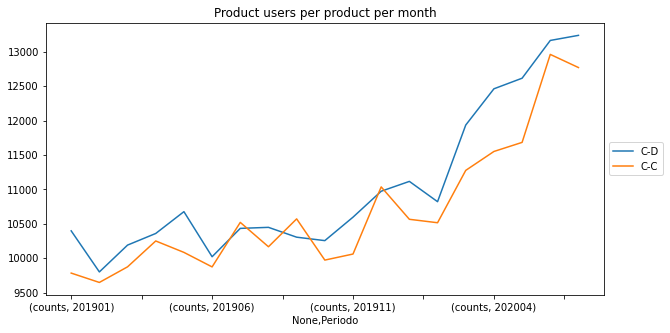

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
usage_counts[['C-D','C-C']].plot(ax=ax)
plt.sca(ax)
plt.title('Product users per product per month')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

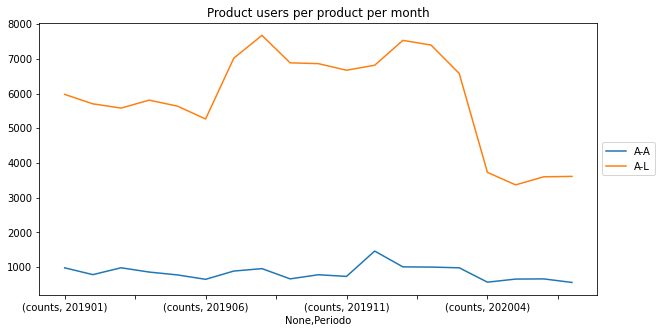

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
usage_counts[['A-A','A-L']].plot(ax=ax)
plt.sca(ax)
plt.title('Product users per product per month')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

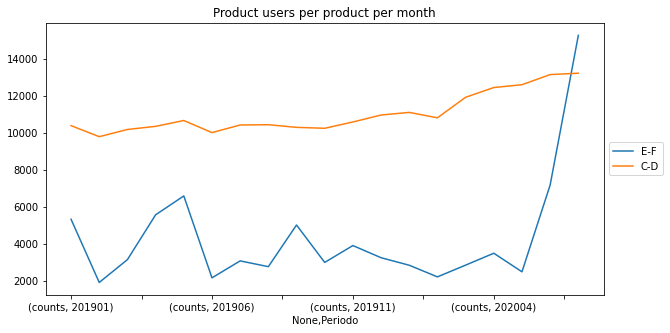

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
usage_counts[['E-F','C-D']].plot(ax=ax)
plt.sca(ax)
plt.title('Product users per product per month')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
products = ['A-A','B-B','C-D','D-E','E-E']

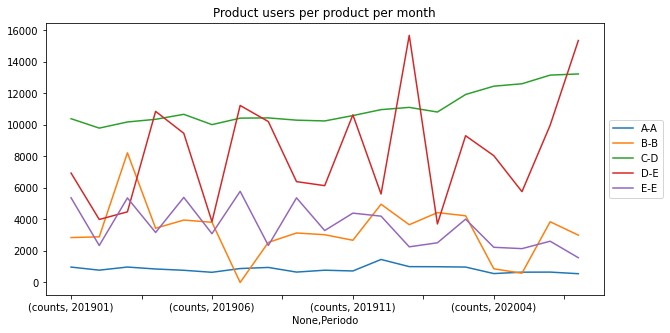

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
usage_counts[products].plot(ax=ax)
plt.sca(ax)
plt.title('Product users per product per month')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

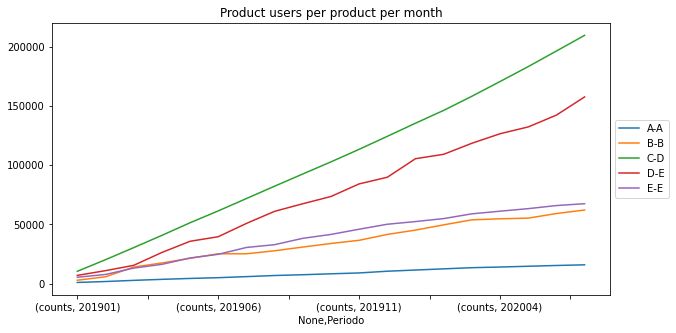

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
usage_counts[products].cumsum().plot(ax=ax)
plt.sca(ax)
plt.title('Product users per product per month')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
C-D, D-E, E-E, B-B, A-A

## Campaings

In [ ]:
!pip install pyspark

     |████████████████████████████████| 204.2MB 49kB/s 
     |████████████████████████████████| 204kB 36.0MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=206da31608cfa229a833ec86086060ac6cd8f4a7b50c1acc6f1ef423b6f946eb
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = (SparkSession.builder.appName("SparkSQLExampleApp").getOrCreate())
cp_df = spark.read.csv(str(ds.BASE_DATA_PATH/'Campanas_train.csv'), header=True)
from pyspark.sql.functions import count
counts_ = (cp_df.groupBy(['id','Producto-Tipo','Periodo']).agg(count('Producto-Tipo').alias('counts'))).toPandas()
counts_ = counts_.set_index(['id','Producto-Tipo','Periodo']).unstack(-1).fillna(0)
cp_counts = (counts_.unstack(-1)>0).sum().unstack()

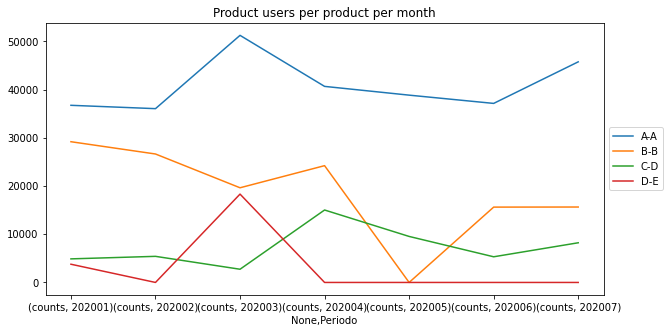

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
cp_counts.plot(ax=ax)
plt.sca(ax)
plt.title('Product users per product per month')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Campains

In [ ]:
import numpy as np
from dataset.dataset import Dataset

ds = Dataset()
ds.load_data()

products = ["A-A", "B-B", "C-D", "D-E", "E-E"]

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
ds.products_df

,id,Id_Producto,Tipo,Producto-Tipo,Signo,Monto,Fecha,Periodo
396,2,B,B,B-B,Negativo,2.934980e+05,2019-12-18,201912
397,2,C,D,C-D,Positivo,6.927867e+05,2019-08-01,201908
398,2,C,D,C-D,Positivo,3.640941e+06,2019-10-30,201910
399,2,C,D,C-D,Positivo,3.662210e+06,2020-01-02,202001
400,2,C,D,C-D,Positivo,3.675668e+06,2020-03-06,202003
...,...,...,...,...,...,...,...,...
24397447,79539,C,D,C-D,Positivo,1.921557e+05,2020-05-15,202005
24397448,79539,C,D,C-D,Positivo,5.514963e+05,2020-06-08,202006
24397449,79539,C,D,C-D,Positivo,3.201600e+05,2020-07-02,202007
24397469,79539,E,E,E-E,Positivo,1.207140e+05,2019-11-25,201911


In [ ]:
print('Producto-Tipo  Campains in train ',list(ds.campains_train_df['Producto-Tipo'].unique()))
print('Producto-Tipo  Campains in test ',list(ds.campains_test_df['Producto-Tipo'].unique()))

Producto-Tipo  Campains in train  ['A-A', 'B-B', 'C-D', 'D-E']
Producto-Tipo  Campains in test  ['A-A', 'D-E', 'B-B', 'C-D']


In [ ]:
import seaborn as sns
campain_short_dur = ds.campains_train_df[ds.campains_train_df['Duracion_Campaña'] ]
table_plot = campain_short_dur.groupby([''])
sns.barplot(x="Fecha_Campaña", y="total_bill", hue="weekend",
                 data=ds.campains_train_df, dodge=False)

In [ ]:
list(ds.campains_train_df['Producto-Tipo'].unique())

['A-A', 'B-B', 'C-D', 'D-E']

In [ ]:
fechas = [int(str(x).replace('-','')) for x in ds.campains_train_df['Fecha_Campaña'].dt.to_period('M')]
sum((fechas - ds.campains_train_df['Periodo']) == 0) == len(ds.campains_train_df)

True

In [ ]:
sum((fechas - ds.campains_train_df['Periodo']) )

493328

In [ ]:
ds.campains_train_df.groupby('Producto-Tipo').agg({'id':'nunique'})

,id
Producto-Tipo,
A-A,63467
B-B,50514
C-D,30287
D-E,20704


In [ ]:
camp_res_pos = ds.campains_train_df[ds.campains_train_df['Resultado']==1]
camp_res_pos.groupby('Producto-Tipo').agg({'id':'nunique'})

,id
Producto-Tipo,
A-A,5553
B-B,0
C-D,2228
D-E,0
